In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dados = {
    'alimento': ['maçã', 'banana', 'hamburguer', 'batata frita'],
    'calorias': [52, 96, 250, 365],
    'gordura': [0.2, 0.2, 9, 17]
}

df = pd.DataFrame(dados)

In [ ]:
x = df[['calorias', 'gordura']]
y = df['alimento'].apply(lambda x: 'saudável' if x in ['maçã', 'banana'] else 'não saudável')

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
modelo = DecisionTreeClassifier()
modelo.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
novos_alimentos = pd.DataFrame({'calorias': [150, 75], 'gordura': [5, 0.5]})

previsoes = modelo.predict(novos_alimentos)

for alimento, previsao in zip(novos_alimentos.values, previsoes):
    if previsao == 'saudável':
        print(f"{tuple(alimento)} é considerado um alimento saudável.")
    else:
        print(f"{tuple(alimento)} é considerado um alimento não saudável.")

(150.0, 5.0) é considerado um alimento não saudável.
(75.0, 0.5) é considerado um alimento saudável.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
dados = {
    'alimento': ['maçã', 'banana', 'hamburguer', 'batata frita'],
    'calorias': [52, 96, 250, 365],
    'gordura': [0.2, 0.2, 9, 17]
}

df = pd.DataFrame(dados)

In [5]:
df['classificacao'] = np.where(df['alimento'].isin(['maçã', 'banana']), 'saudável', 'não saudável')

In [6]:
novos_alimentos = pd.DataFrame({'calorias': [150, 75], 'gordura': [5, 0.5]})

novos_alimentos['classificacao'] = np.where((novos_alimentos['calorias'] < 100) & (novos_alimentos['gordura'] < 1), 'saudável', 'não saudável')

In [7]:
for index, row in novos_alimentos.iterrows():
    alimento = tuple(row[['calorias', 'gordura']])
    classificacao = row['classificacao']
    print(f"{alimento} é considerado um alimento {classificacao}.")

(150, 5.0) é considerado um alimento não saudável.
(75, 0.5) é considerado um alimento saudável.


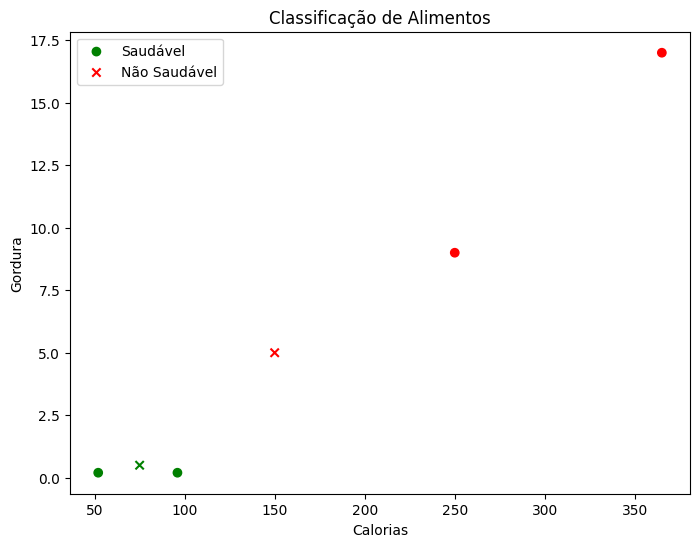

In [9]:
# Plotando gráfico de dispersão
plt.figure(figsize=(8, 6))
plt.scatter(df['calorias'], df['gordura'], c=df['classificacao'].map({'saudável': 'green', 'não saudável': 'red'}))
plt.scatter(novos_alimentos['calorias'], novos_alimentos['gordura'], marker='x', c=novos_alimentos['classificacao'].map({'saudável': 'green', 'não saudável': 'red'}))
plt.xlabel('Calorias')
plt.ylabel('Gordura')
plt.title('Classificação de Alimentos')
plt.legend(['Saudável', 'Não Saudável'])
plt.show()
